# Quick start with Retentioneering

## Prerequisites

Run this cell to prepare the environment. This step is obligatory.

In [ ]:
!pip install retentioneering

In [1]:
import retentioneering
import pandas as pd

The full text of [Quick start](https://doc.retentioneering.com/release3/doc/getting_started/quick_start.html) user guide is available on the retentioneering website.

## Loading data

In [2]:
from retentioneering import datasets

# load sample user behavior data:
stream = datasets.load_simple_shop()

In [3]:
stream.to_dataframe().head()

event_id event_type  event_index     event  \
0  67ef5d7c-3ff7-4832-92d1-c876e239a069        raw            0   catalog   
1  6e679d54-827a-420f-8217-3b7cc1220e56        raw            1  product1   
2  3d78d94c-075f-4ed7-a65b-1298a87def25        raw            2      cart   
3  5c9fcb17-98fb-488b-8e17-2f0b5ca25cb7        raw            3   catalog   
4  2cbd873d-43af-4087-9661-4eaf36ae8800        raw            4   catalog   

                   timestamp    user_id  
0 2019-11-01 17:59:13.273932  219483890  
1 2019-11-01 17:59:28.459271  219483890  
2 2019-11-01 17:59:29.502214  219483890  
3 2019-11-01 17:59:32.557029  219483890  
4 2019-11-01 21:38:19.283663  964964743

## Preparing the data

In [4]:
# eventstream preprocessing example
stream \
    .split_sessions(timeout=(30, 'm')) \
    .filter_events(func=lambda df_, schema: df_['session_id'].str.endswith('_1')) \
    .to_dataframe() \
    .head()

event_id     event_type  event_index  \
0  36259c2f-de3e-4440-a9d8-0f5917d7c774  session_start            0   
1  67ef5d7c-3ff7-4832-92d1-c876e239a069            raw            1   
2  6e679d54-827a-420f-8217-3b7cc1220e56            raw            2   
3  3d78d94c-075f-4ed7-a65b-1298a87def25            raw            3   
4  5c9fcb17-98fb-488b-8e17-2f0b5ca25cb7            raw            4   

           event                  timestamp    user_id   session_id  
0  session_start 2019-11-01 17:59:13.273932  219483890  219483890_1  
1        catalog 2019-11-01 17:59:13.273932  219483890  219483890_1  
2       product1 2019-11-01 17:59:28.459271  219483890  219483890_1  
3           cart 2019-11-01 17:59:29.502214  219483890  219483890_1  
4        catalog 2019-11-01 17:59:32.557029  219483890  219483890_1

# Applying path analysis tools

## Transition graph

In [5]:
stream.transition_graph()

## Step matrix

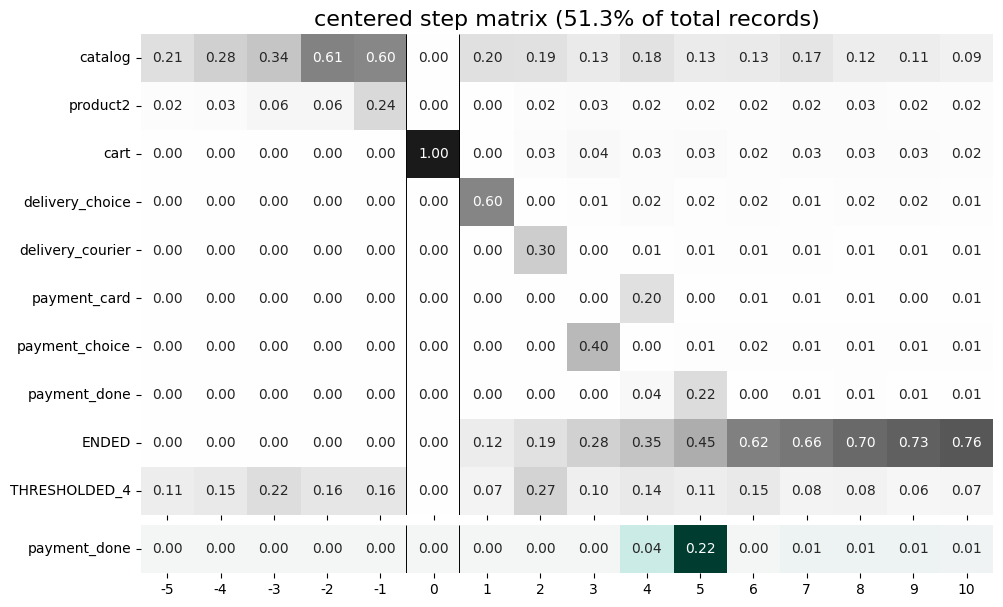

In [6]:
stream.step_matrix(
    max_steps=16,
    threshold=0.2,
    centered={
        'event': 'cart',
        'left_gap': 5,
        'occurrence': 1
    },
    targets=['payment_done']
)

## Step Sankey diagram

In [7]:
stream.step_sankey(max_steps=6, threshold=0.05)

## Cluster analysis

/Users/Daria/venv/rete_tools/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



<Axes: xlabel='clusters', ylabel='value'>

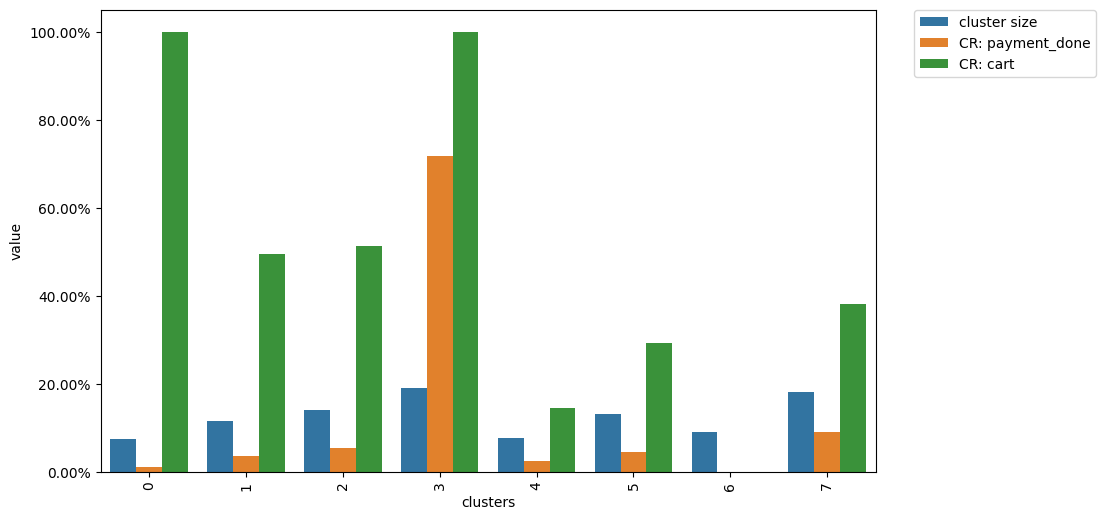

In [8]:
from retentioneering.tooling.clusters import Clusters

clusters = Clusters(stream)
features = clusters.extract_features(feature_type='tfidf', ngram_range=(1, 2))
clusters.fit(method='kmeans', n_clusters=8, X=features)
clusters.plot(targets=['payment_done', 'cart'])

## Funnel analysis

In [9]:
stream.funnel(stages=['catalog', 'cart', 'payment_done'])

## Cohort analysis

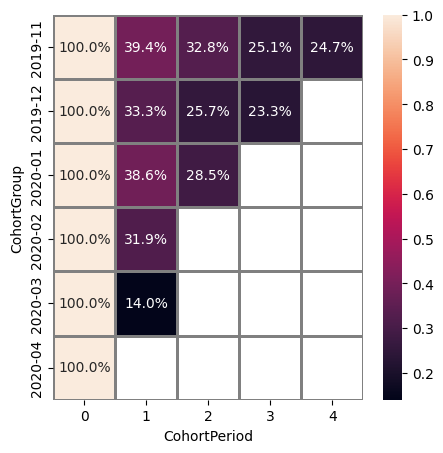

In [10]:
stream.cohorts(
    cohort_start_unit='M',
    cohort_period=(1, 'M'),
    average=False,
)